# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [69]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy



In [70]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [90]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=100)
lngs = np.random.uniform(low=-180.000, high=180.000, size=100)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities


['bluff',
 'atuona',
 'taolanaro',
 'aklavik',
 'longyearbyen',
 'nokaneng',
 'hongjiang',
 'upernavik',
 'state college',
 'ushuaia',
 'dawlatabad',
 'busselton',
 'turukhansk',
 'umzimvubu',
 'tasiilaq',
 'mar del plata',
 'lebu',
 'esperance',
 'sioux lookout',
 'illoqqortoormiut',
 'kenmare',
 'rikitea',
 'jijiga',
 'torbay',
 'havelock',
 'albany',
 'faanui',
 'arraial do cabo',
 'amuntai',
 'cape town',
 'alofi',
 'bredasdorp',
 'saleaula',
 'mount gambier',
 'bloemhof',
 'avarua',
 'geraldton',
 'dikson',
 'punta arenas',
 'tuktoyaktuk',
 'tyler',
 'thompson',
 'hermanus',
 'mys shmidta',
 'ola',
 'baturinskaya',
 'khatanga',
 'mahebourg',
 'gijon',
 'ilulissat',
 'hasaki',
 'vaini',
 'caravelas',
 'vila',
 'port alfred',
 'willowmore',
 'east london',
 'alekseyevka',
 'la ronge',
 'nanortalik',
 'burnie',
 'nyurba',
 'beringovskiy',
 'togur',
 'ahipara',
 'mendi',
 'ejido',
 'saint-philippe',
 'veraval',
 'gashua',
 'tsihombe',
 'varhaug',
 'faya',
 'hobart',
 'raudeberg']

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [91]:
api_key = api_key

In [92]:
 #Create a base url
base_url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + api_key

# Counters
city_counter = 1
set_counter = 1

# Create the lists to hold relative data
cities_list= []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

print("Beginning Data Retrieval")

# Create a query url for each city in the cities list to get json response
for i, city in enumerate(cities):
    
    # Group cities as sets of 50s
    if (i % 50 == 0 and i >= 100):
        set_counter += 1
        city_counter = 1
    # Create API url for each city
    query_url = base_url +"&q=" + city
    
    # Get json respose for each city
    response = requests.get(query_url).json()
    
    # Print the results 
    print(f"Processing Record  {city_counter} of Set {set_counter} | {city}")
    
    # Increase city counter
    city_counter += 1
    
   # Add the values to the lists
    try:       
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        cities_list.append(response["name"])
    except:
        print("City not found. Skipping...")
        pass
print("------------------------")        
print("Completed Data Retrieval")



Beginning Data Retrieval
Processing Record  1 of Set 1 | bluff
Processing Record  2 of Set 1 | atuona
Processing Record  3 of Set 1 | taolanaro
City not found. Skipping...
Processing Record  4 of Set 1 | aklavik
Processing Record  5 of Set 1 | longyearbyen
Processing Record  6 of Set 1 | nokaneng
Processing Record  7 of Set 1 | hongjiang
Processing Record  8 of Set 1 | upernavik
Processing Record  9 of Set 1 | state college
Processing Record  10 of Set 1 | ushuaia
Processing Record  11 of Set 1 | dawlatabad
Processing Record  12 of Set 1 | busselton
Processing Record  13 of Set 1 | turukhansk
Processing Record  14 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record  15 of Set 1 | tasiilaq
Processing Record  16 of Set 1 | mar del plata
Processing Record  17 of Set 1 | lebu
Processing Record  18 of Set 1 | esperance
Processing Record  19 of Set 1 | sioux lookout
Processing Record  20 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record  21 of Set 1 | k

In [93]:
# Create a dictionary to keep data 
weather_data = {
     "City": cities_list,
     "Cloudiness": cloudiness,
     "Country": country,
     "Date": date,
     "Humidity": humidity,
     "Lat": lat,
     "Lng": lng,
     "Max Temp": max_temp,
     "Wind Speed": wind_speed    
 }

# Create the data frame and count variables for each columns
weather_df = pd.DataFrame(weather_data)
weather_df.count()

City          69
Cloudiness    69
Country       69
Date          69
Humidity      69
Lat           69
Lng           69
Max Temp      69
Wind Speed    69
dtype: int64

In [94]:
# Display the data frame
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Bluff,15,NZ,1583345160,87,-46.60,168.33,41.00,1.99
1,Atuona,12,PF,1583345161,74,-9.80,-139.03,81.03,12.91
2,Aklavik,75,CA,1583345161,67,68.22,-135.01,-27.40,3.36
3,Longyearbyen,75,SJ,1583345162,85,78.22,15.64,15.80,9.17
4,Nokaneng,78,BW,1583345163,80,-19.67,22.27,69.28,8.52


In [117]:
weather_df.to_csv("Weather.csv", encoding='utf-8', index=False)


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

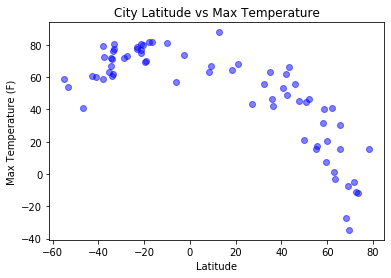

In [95]:
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], color='b', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs Max Temperature')
plt.savefig("LatVsTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

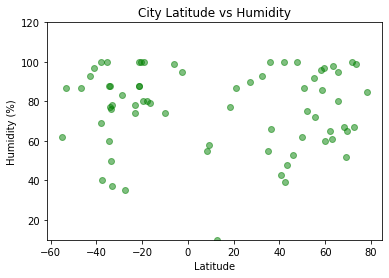

In [96]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], color='g', alpha=0.5)
plt.ylim(10,120)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity')
plt.savefig("LatVsHumidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

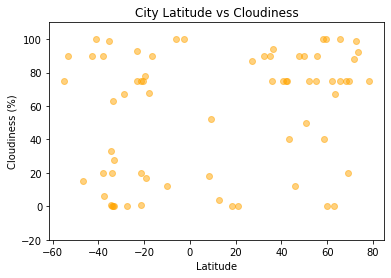

In [97]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], color='orange', alpha=0.5)

plt.ylim(-20,(weather_df["Cloudiness"].max()+10))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness')
plt.savefig("LatVsCloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

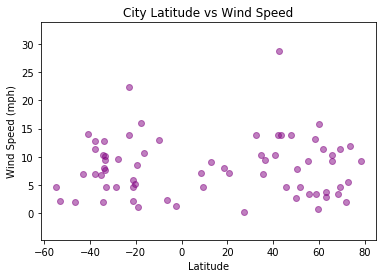

In [98]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], color='purple', alpha=0.5)

plt.ylim((weather_df["Wind Speed"].min()-5),(weather_df["Wind Speed"].max()+5))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs Wind Speed')
plt.savefig("LatVsWind.png")
plt.show()

## Linear Regression

In [99]:
# OPTIONAL: Create a function to create Linear Regression plots


In [100]:
# Create Northern and Southern Hemisphere DataFrames

Northern_df = weather_df[weather_df['Lat'] >= 0]
Northern_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
2,Aklavik,75,CA,1583345161,67,68.22,-135.01,-27.40,3.36
3,Longyearbyen,75,SJ,1583345162,85,78.22,15.64,15.80,9.17
5,Hongjiang,87,CN,1583345164,90,27.11,110.00,43.54,0.27
6,Upernavik,99,GL,1583345037,67,72.79,-56.15,-11.29,5.61
7,State College,75,US,1583345165,43,40.79,-77.86,53.01,10.29
9,Dawlatabad,94,AF,1583345167,66,36.41,64.91,42.31,9.40
11,Turukhansk,100,RU,1583345169,95,65.82,87.98,15.58,9.17
12,Tasiilaq,75,GL,1583345170,80,65.61,-37.64,30.20,10.29
16,Sioux Lookout,90,CA,1583345172,62,50.10,-91.92,21.20,2.66
17,Kenmare,75,IE,1583345173,75,51.88,-9.58,46.40,4.70


In [102]:
Southern_df = weather_df[weather_df['Lat'] < 0]
Southern_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Bluff,15,NZ,1583345160,87,-46.60,168.33,41.00,1.99
1,Atuona,12,PF,1583345161,74,-9.80,-139.03,81.03,12.91
4,Nokaneng,78,BW,1583345163,80,-19.67,22.27,69.28,8.52
8,Ushuaia,75,AR,1583345166,62,-54.80,-68.30,59.00,4.70
10,Busselton,63,AU,1583345168,50,-33.65,115.33,62.01,10.16
13,Mar del Plata,20,AR,1583345015,69,-38.00,-57.56,79.00,11.41
14,Lebu,6,CL,1583345171,40,-37.62,-73.65,72.16,12.73
15,Esperance,0,AU,1583345171,77,-33.87,121.90,60.80,12.75
18,Rikitea,93,PF,1583345173,78,-23.12,-134.97,77.32,22.41
23,Faanui,90,PF,1583345174,79,-16.48,-151.75,81.73,10.60


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

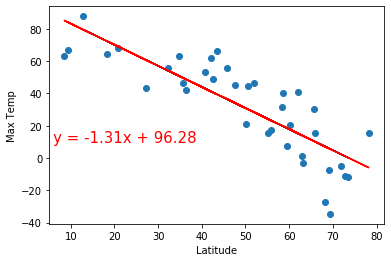

In [105]:
# Add the linear regression equation and line to plot
x_values = Northern_df['Lat']
y_values = Northern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

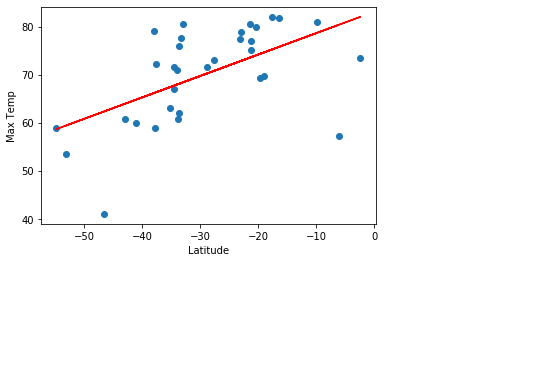

In [106]:
# Add the linear regression equation and line to plot
x_values = Southern_df['Lat']
y_values = Southern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

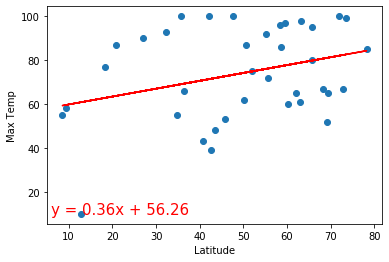

In [107]:
# Add the linear regression equation and line to plot
x_values = Northern_df['Lat']
y_values = Northern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

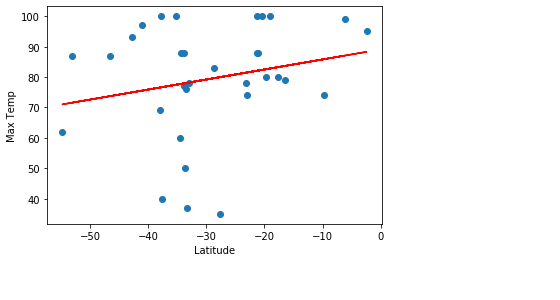

In [108]:
# Add the linear regression equation and line to plot
x_values = Southern_df['Lat']
y_values = Southern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

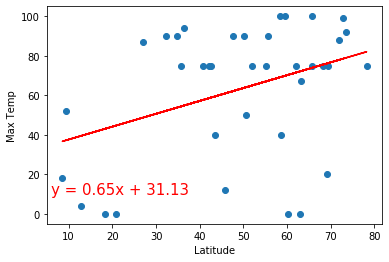

In [109]:
# Add the linear regression equation and line to plot
x_values = Northern_df['Lat']
y_values = Northern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

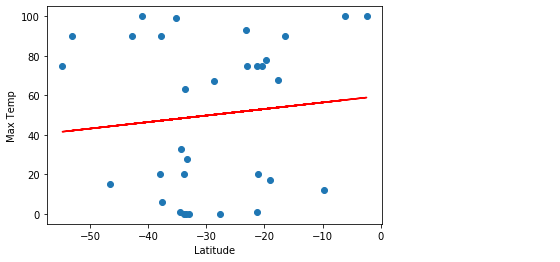

In [110]:
# Add the linear regression equation and line to plot
x_values = Southern_df['Lat']
y_values = Southern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

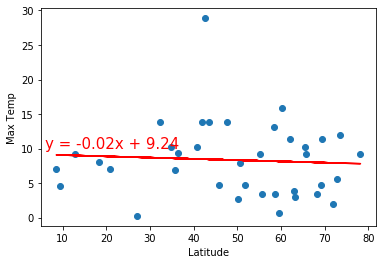

In [111]:
# Add the linear regression equation and line to plot
x_values = Northern_df['Lat']
y_values = Northern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

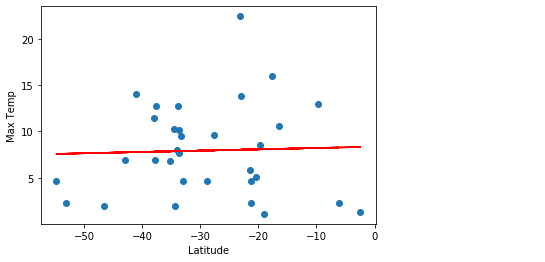

In [112]:
# Add the linear regression equation and line to plot
x_values = Southern_df['Lat']
y_values = Southern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()